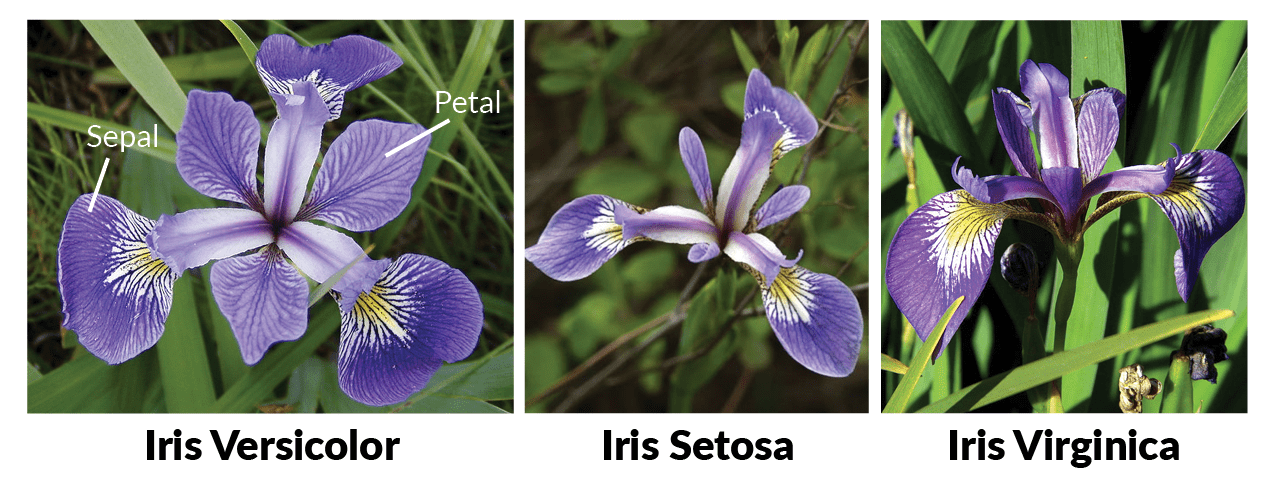

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import mglearn
import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('datasets/iris.csv')

In [44]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
df = df.drop('Id', axis=1)
df.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa


In [46]:
df.keys()

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [47]:
df.value_counts('Species')

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [131]:
df['Species'] = df['Species'].str.removeprefix("Iris-")
df['Species'] = df['Species'].str.capitalize()

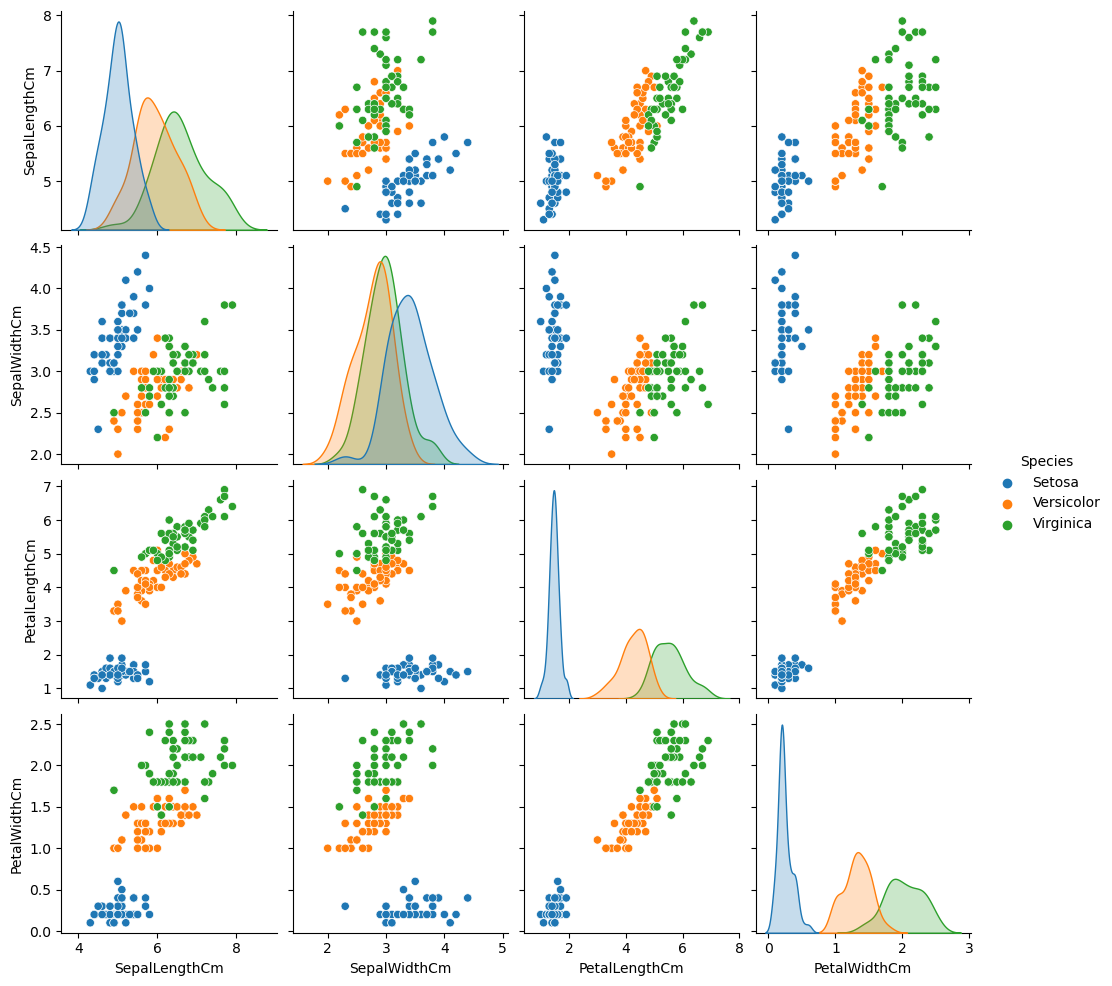

In [132]:
sns.pairplot(df, hue='Species')

In [133]:
target = df['Species']
features = df.drop('Species', axis=1)

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.2, random_state=101)

In [151]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


### KNN model

In [136]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [137]:
X_for_test = np.array([[5.1,3.5,1.4,0.2]])

In [138]:
test_prediction = knn.predict(X_for_test)
print("Prediction:", test_prediction)

Prediction: ['Setosa']


In [139]:
X_for_test_2 = np.array([[6.2,3.4,5.4,2.3]])

In [140]:
test_prediction_2 = knn.predict(X_for_test_2)
print("Prediction:", test_prediction_2)

Prediction: ['Virginica']


In [141]:
y_pred = knn.predict(X_test)

In [149]:
print("Test score: {:.2f}".format(np.mean(y_pred == y_test)))

Test score: 1.00


In [156]:
print("Test score: ",knn.score(X_test, y_test)*100,"%")

Test score:  100.0 %


In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        12
   Virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

